<a href="https://colab.research.google.com/github/LiuYiShan613/EDA/blob/main/LTV_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x:'%.2f'% x)

In [ ]:
customer_value = pd.read_csv('/content/drive/MyDrive/data/new.csv')
#查看前5筆檔案欄位資訊
customer_value.head(5)

,Unnamed: 0,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,0,9100002488768.00,123,3,23,2,268088.00,2,7,High-Value
1,1,9100002508831.00,16,3,25,2,276824.00,2,7,High-Value
2,2,9100001761848.00,61,3,20,2,197248.00,2,7,High-Value
3,3,9100002514344.00,32,3,15,2,219224.00,2,7,High-Value
4,4,9100002184202.00,18,3,20,2,235864.00,2,7,High-Value


In [ ]:
customer_value = customer_value.drop('Unnamed: 0',axis = 1)
customer_value

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,High-Value
1,9100002508831.00,16,3,25,2,276824.00,2,7,High-Value
2,9100001761848.00,61,3,20,2,197248.00,2,7,High-Value
3,9100002514344.00,32,3,15,2,219224.00,2,7,High-Value
4,9100002184202.00,18,3,20,2,235864.00,2,7,High-Value
...,...,...,...,...,...,...,...,...,...
71200,9100001558486.00,113,3,38,3,45080.00,0,6,High-Value
71201,9100001384559.00,39,3,33,3,38816.00,0,6,High-Value
71202,9100001270685.00,33,3,31,3,67568.00,0,6,High-Value
71203,9100000258929.00,149,2,27,3,58896.00,0,5,High-Value


# Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customer_value['Segment'] = labelencoder.fit_transform(customer_value['Segment'])
customer_value.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,0
1,9100002508831.00,16,3,25,2,276824.00,2,7,0
2,9100001761848.00,61,3,20,2,197248.00,2,7,0
3,9100002514344.00,32,3,15,2,219224.00,2,7,0
4,9100002184202.00,18,3,20,2,235864.00,2,7,0


In [ ]:
labelencoder.classes_

array(['High-Value', 'Low-Value', 'Mid-Value'], dtype=object)

# Calculate and Show correlations

In [ ]:
#看兩個變數之間的差異程度，愈相似愈靠近1。有正相關和負相關，-1~1
corr_matrix = customer_value.corr()
corr_matrix
#相關係數對角線都會是1
#feature量不夠多，所以才會出現很多1，因為很多資料根本沒什麼差異

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
CustomerID,1.00,0.13,-0.13,-0.29,-0.29,-0.30,-0.29,-0.27,0.16
Recency,0.13,1.00,-0.97,-0.47,-0.48,-0.44,-0.45,-0.77,0.17
RecencyCluster,-0.13,-0.97,1.00,0.47,0.48,0.44,0.44,0.78,-0.17
Frequency,-0.29,-0.47,0.47,1.00,0.96,0.93,0.91,0.89,-0.59
FrequencyCluster,-0.29,-0.48,0.48,0.96,1.00,0.89,0.89,0.91,-0.58
Revenue,-0.30,-0.44,0.44,0.93,0.89,1.00,0.95,0.87,-0.57
RevenueCluster,-0.29,-0.45,0.44,0.91,0.89,0.95,1.00,0.89,-0.61
OverallScore,-0.27,-0.77,0.78,0.89,0.91,0.87,0.89,1.00,-0.51
Segment,0.16,0.17,-0.17,-0.59,-0.58,-0.57,-0.61,-0.51,1.00


In [ ]:
corr_matrix['Segment'].sort_values(ascending=False)
print(corr_matrix['Segment'].sort_values(ascending=False))

Segment             1.00
Recency             0.17
CustomerID          0.16
RecencyCluster     -0.17
OverallScore       -0.51
Revenue            -0.57
FrequencyCluster   -0.58
Frequency          -0.59
RevenueCluster     -0.61
Name: Segment, dtype: float64


# **Standaration**

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = scalar.fit_transform(customer_value[['Recency', 'Frequency', 'RecencyCluster', 'FrequencyCluster', 'Revenue', 'RevenueCluster']])
#x = scalar.fit_transform(customer_value[['Recency', 'Frequency', 'Revenue']])
# 結果
y = customer_value['Segment']

In [ ]:
x,y

(array([[-0.73342026,  1.44730373,  1.09562677,  1.28693312,  1.48475403,
          1.59312044],
        [-1.23016427,  1.64879703,  1.09562677,  1.28693312,  1.55725989,
          1.59312044],
        [-1.02125323,  1.14506377,  1.09562677,  1.28693312,  0.89680581,
          1.59312044],
        ...,
        [-1.15124232,  2.25327694,  1.09562677,  2.30514564, -0.17949467,
         -0.68157934],
        [-0.61271611,  1.85029033,  0.20341501,  2.30514564, -0.25146935,
         -0.68157934],
        [ 1.434612  ,  2.45477025, -1.58100852,  2.30514564, -0.45384837,
         -0.68157934]]), 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 71200    0
 71201    0
 71202    0
 71203    0
 71204    2
 Name: Segment, Length: 71205, dtype: int64)

# Split Test and Train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=56)

In [ ]:
X_train,y_train

(array([[-0.17632418, -0.26538936,  0.20341501,  0.26872059, -0.01316939,
          0.45577055],
        [-1.04446557, -0.56762932,  1.09562677, -0.74949193, -0.70111197,
         -0.68157934],
        [ 0.34827463, -0.06389606, -0.68879675,  0.26872059, -0.25950343,
         -0.68157934],
        ...,
        [-1.10017518,  2.5555169 ,  1.09562677,  2.30514564,  2.98978196,
          2.73047033],
        [-1.28123141,  1.14506377,  1.09562677,  1.28693312,  1.20017514,
          1.59312044],
        [-1.12338752, -0.36613601,  1.09562677, -0.74949193, -0.52157363,
         -0.68157934]]), 19289    2
 33942    2
 31778    1
 64818    1
 47781    1
         ..
 65769    1
 42106    1
 25835    0
 3264     0
 33167    2
 Name: Segment, Length: 35602, dtype: int64)

# Support Vector Machine

In [ ]:
#參數
#1. 核函數 kernel - 在模型裡面，我們可以選擇各式各樣的核函數，包含線性、多項式、高斯、sigmoid等等
#2. 參數C - C為懲罰係數。 C愈大代表錯誤的容忍程度愈低，在訓練集樣本中會區分的愈精細，因此設定太大容易造成過度擬和的問題。反之，設定太小則會造成低度擬合的問題。若沒設定，模型中預設為1。
#3. 參數gamma - gamma參數決定支援向量的多寡，並影響訓練速度與預測速度 。此參數有兩個自動運算選擇，分別為’scale’與’auto’，或是也可以直接指定數值，設定後會以下列方式算出隱含參數，以決定資料映射到新特徵空間後的分佈，在未設定下預設為’scale’。

from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

clf = svm.SVC(kernel='rbf',C=1,gamma='auto')
clf.fit(X_train, y_train)

clf.predict(X_test)

array([1, 1, 2, ..., 1, 2, 0])

In [ ]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

#交叉驗證
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

1.0
1.0
[1.         1.         1.         1.         0.99985955]
0.9999719101123595


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_prd = logreg.predict(X_test)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

1.0
1.0


# Naive Bytes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.889416324925566
0.8890823806982557


# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.999943823380709
0.9999438249585709


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8986854671085894
0.8962727860011797


[Text(167.4, 181.2, 'X[4] <= -0.173\nentropy = 1.507\nsamples = 35602\nvalue = [10080, 17394, 8128]'),
 Text(83.7, 108.72, 'X[2] <= 0.65\nentropy = 0.803\nsamples = 22076\nvalue = [23, 16799, 5254]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.252\nsamples = 17539\nvalue = [0, 16799, 740]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.046\nsamples = 4537\nvalue = [23, 0, 4514]'),
 Text(251.10000000000002, 108.72, 'X[0] <= -0.652\nentropy = 0.991\nsamples = 13526\nvalue = [10057, 595, 2874]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.138\nsamples = 8122\nvalue = [7965, 0, 157]'),
 Text(292.95, 36.23999999999998, 'entropy = 1.379\nsamples = 5404\nvalue = [2092, 595, 2717]')]

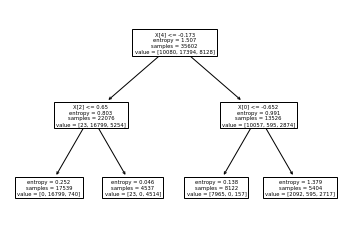

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
tree.plot_tree(model)

# xgboost

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.999943823380709
0.9999438249585709
